In [23]:
# Sử dụng các thư viện sau để train mô hình
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
%cd /content/drive/MyDrive/Colab Notebooks/Data

/content/drive/MyDrive/Colab Notebooks/Data


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tải bộ dữ liệu training set
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Data/Food_Giang/Train",target_size=(150,150), batch_size=32, class_mode='categorical')

Found 3008 images belonging to 10 classes.


In [ ]:
# Tải bộ dữ liệu validation
validation=train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/Data/Food_Giang/Validation",target_size=(150,150), batch_size=32, class_mode='categorical')

Found 360 images belonging to 10 classes.


In [ ]:
# Quan sát các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [ ]:
# Quan sát các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Banh cuon': 0,
 'Banh mi': 1,
 'Banh pia': 2,
 'Banh tet': 3,
 'Banh xeo': 4,
 'Bun dau mam tom': 5,
 'Ca kho to': 6,
 'Com tam': 7,
 'Nem': 8,
 'Pho': 9}

In [ ]:
# Tạo mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [13]:
# Biên dịch mô hình
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Train mô hình với 500 lần học (epochs), mỗi lần học 50 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng việc train
history=model.fit(training_set,epochs=500,batch_size=50,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
94/94 [==============================] - 82s 863ms/step - loss: 0.1742 - accuracy: 0.9458 - val_loss: 1.6358 - val_accuracy: 0.7139
Epoch 2/500
94/94 [==============================] - 71s 762ms/step - loss: 0.1565 - accuracy: 0.9531 - val_loss: 1.4631 - val_accuracy: 0.6889
Epoch 3/500
94/94 [==============================] - 70s 743ms/step - loss: 0.1852 - accuracy: 0.9445 - val_loss: 1.4268 - val_accuracy: 0.6972
Epoch 4/500
94/94 [==============================] - 69s 736ms/step - loss: 0.1546 - accuracy: 0.9555 - val_loss: 1.5625 - val_accuracy: 0.7250
Epoch 5/500
94/94 [==============================] - 69s 738ms/step - loss: 0.1600 - accuracy: 0.9511 - val_loss: 1.5610 - val_accuracy: 0.7028
Epoch 6/500
94/94 [==============================] - 70s 741ms/step - loss: 0.1390 - accuracy: 0.9538 - val_loss: 1.3807 - val_accuracy: 0.7250
Epoch 7/500
94/94 [==============================] - 69s 733ms/step - loss: 0.1479 - accuracy: 0.9525 - val_loss: 1.5659 - val_accuracy:

In [18]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.06820819526910782
Train Accuracy 0.980053186416626


<function matplotlib.pyplot.show>

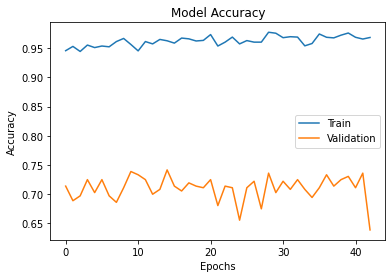

In [19]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [20]:
# Lưu lại
model.save("VN_Food.h5")

In [21]:
# Tải mô hình 
model_CNN=load_model('VN_Food.h5')

BANH CUON


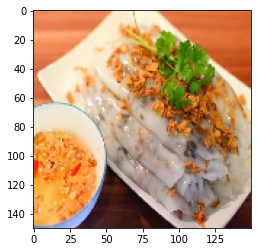

BANH MI


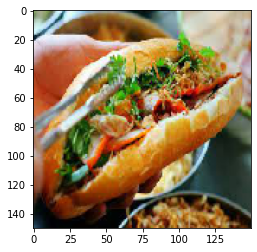

BANH PIA


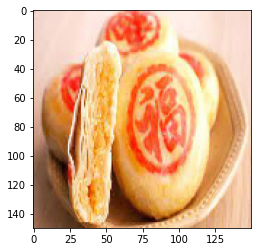

BANH TET


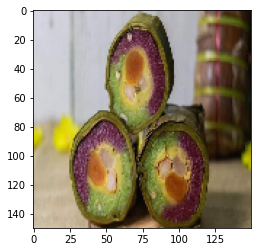

CA KHO TO


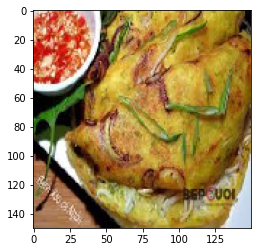

BANH XEO


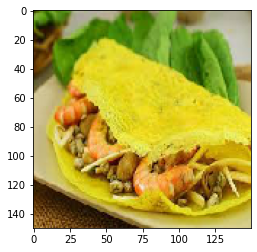

BUN DAU MAM TOM


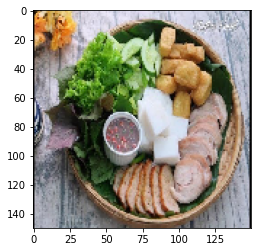

CA KHO TO


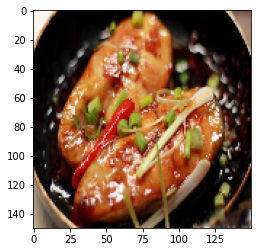

In [27]:
# Kiểm tra hình của từng bạn với bộ dữ liệu test_set
test="/content/drive/MyDrive/Colab Notebooks/Data/TEST_DATA/Test_FOOD/FOOD_8"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='BANH CUON'
  if round(result[0][1])==1:
    prediction='BANH MI'
  if round(result[0][2])==1:
    prediction='BANH PIA'
  if round(result[0][3])==1:
    prediction='BANH TET'
  if round(result[0][4])==1:
    prediction='BANH XEO'
  if round(result[0][5])==1:
    prediction='BUN DAU MAM TOM'
  if round(result[0][6])==1:
    prediction='CA KHO TO'
  if round(result[0][7])==1:
    prediction='COM TAM'
  if round(result[0][8])==1:
    prediction='NEM'
  if round(result[0][9])==1:
    prediction='PHO'
  print(prediction)
  plt.show()

In [28]:
 # Chuyển sang pdf
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('FOOD.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-generic-recommended is already the newest version (2017.20180305-1).
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.
File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/FOOD.ipynb to pdf
[NbConvertApp] Support files will be in FOOD_files/
[NbConvertApp] Making directory ./FOOD_files
[NbConvertApp] Making directory ./FOOD_files
[NbConvertApp] Making directory ./FOOD_files
[NbConvertApp] Making

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'